<center><h1 style="color:red;" >Analysis of AirBnb Data</h1></center>

# Introduction

<p>AirBnb is one of the fastest growing companies. It provides a service where hosts with spare rooms can rent them out to guests and collects a comission. More details about the company can be found at <a href="https://www.airbnb.com/">https://www.airbnb.com/</a> </p>.
<p>Our interest is finding out what their data can tell us. What insights we can get and if this insights can help other businesses in the same industry space like travel etc.</p>

the data used has been got from <a href="https://www.kaggle.com/maxbaas/airbnb">kaggle</a>

<h3>loading the data</h3>
<p>The data is in a csv file we will be using pandas library to read the csv file.</p>

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('airbnb.csv')

after loading the data we can peek at it to see what we are working with and also get a brief description

In [3]:
data.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [4]:
data.shape

(213451, 16)

<h3>Cleaning the data</h3>
<p>Data in the wild is naturaly dirty. Before we can do meaningful analysis we need to clean it. We can start by addressing missing entries</p>

In [5]:
data.isnull().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

The missing values for the age can be addressed by getting an average age based on the persons gender. Then filling the missing gaps.

[['OTHER', 'FEMALE', 'MALE', '-unknown-'], gender
 -unknown-    46.778781
 FEMALE       52.729749
 MALE         47.082700
 OTHER        62.903509
 Name: age, dtype: float64]

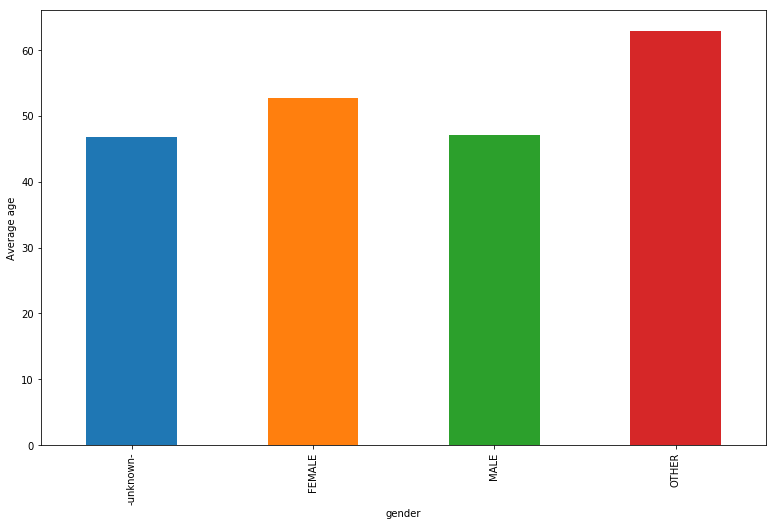

In [7]:
ax = plt.subplot()
ax.set_ylabel('Average age')
data.groupby('gender').mean()['age'].plot(kind='bar',figsize=(13,8), ax = ax)

title_mean_age=[]
title_mean_age.append(list(set(data.gender)))  #set for unique values of the title, and transform into list
title_mean_age.append(data.groupby('gender').age.mean())
title_mean_age

In [10]:
n_traning= data.shape[0]   #number of rows
n_titles= len(title_mean_age[1])
for i in range(0, n_traning):
    if np.isnan(data.age[i])==True:
        for j in range(0, n_titles):
            if data.gender[i] == title_mean_age[0][j]:
                data.age[i] = title_mean_age[1][j]

/home/muoki/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


we will be droping data_first_booking amd first_affiliate_tracked as there is no way of filling the missing values.

In [17]:
dataset = data.drop(['date_first_booking', 'first_affiliate_tracked'], axis=1)

In [18]:
dataset.head()

,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,-unknown-,62.903509,facebook,0,en,direct,direct,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,MALE,38.000000,facebook,0,en,seo,google,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,FEMALE,56.000000,basic,3,en,direct,direct,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,FEMALE,42.000000,facebook,0,en,direct,direct,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,-unknown-,41.000000,basic,0,en,direct,direct,Web,Mac Desktop,Chrome,US


In [20]:
dataset.isnull().sum()

id                        0
date_account_created      0
timestamp_first_active    0
gender                    0
age                       0
signup_method             0
signup_flow               0
language                  0
affiliate_channel         0
affiliate_provider        0
signup_app                0
first_device_type         0
first_browser             0
country_destination       0
dtype: int64

<p>With no empty values we can start analysis of the data.</p>

<function matplotlib.pyplot.show(*args, **kw)>

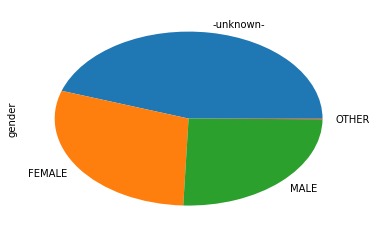

In [23]:
dataset.gender.value_counts().plot(kind='pie')
plt.show